# Metabolome Wide Association Studies

The method is to 

- test association of each metabolite feature to a phenotype (e.g. disease outcome). This can be done by group comparison (e.g. Student t-test to compare two groups).

- In population studies, confounders have to be accounted for. Therefore, regression models are used. For comparing two groups, we use logistic regression. For testing association with a continuous variable, we use linear regression.

There are multiple ways to perform regression using these "generalized linear models". Their Python implementations are explained here:

https://scikit-learn.org/stable/modules/linear_model.html

For this notebook, we use the simple OLS method but from `statsmodels` library.

The same task can be done more easily in R using the `lm` function.

Shuzhao Li, 2019-08-29


In [1]:
# import libraries

import pandas as pd
import numpy as np

import scipy.stats as stats
from statsmodels.sandbox.stats.multicomp import multipletests

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1. Manhattan plots 

This uses the data file `testdata0710.txt` under the data/ folder, which is copied/cloned from

https://github.com/shuzhao-li/espol-workshop/tree/master/data


In [2]:
yfdata = pd.read_csv("data/testdata0710.txt", sep="\t")
print(yfdata.shape)
yfdata.head()

(7995, 5)


,m/z,retention_time,p-value,t-score,custom_id
0,85.0278,59,0.002657,-3.55,AE_pos_85.0278_59
1,85.0472,124,0.730810,-0.35,AE_pos_85.0472_124
2,85.0653,68,0.086509,1.83,AE_pos_85.0653_68
3,85.1007,16,0.057916,-2.04,AE_pos_85.1007_16
4,86.0595,67,0.076789,-1.89,AE_pos_86.0595_67


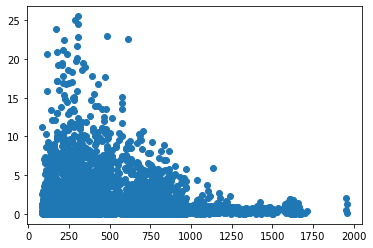

In [3]:
mz = list(yfdata["m/z"])

pval = list(yfdata["p-value"])

# do -log10 on p values

LGpval = [-np.log10(x) for x in pval]

# this makes Manhattan plot, -log10(p-value) vs mz
plt.scatter(mz, LGpval)

### Asignment

Modify the figure above to have the dots colored and sized.

Refer to the `simple_introduction` notebook we used on Tuesday.


## Exercise 2. Spearman rank correlation 

We will test the association of antibody response to metabolomic profile in the HZ vaccine study (Li et al., 2017. Cell 169:862).

The data were prepared for this exercise:
- HZ_antibody_day28v0.tsv
- HZ_metabolomics_day0.tsv

This is the simple correlation without considering confounders. To account for confounders, we will use linear regression in the next section.

In [4]:
# read antibody data
antibody = pd.read_csv("data/HZ_antibody_day28v0.tsv", sep="\t")
print(antibody.shape)
antibody

(70, 2)


,Unnamed: 0,IgG_D28/0
0,ZV1-01-d0,1.884605
1,ZV1-04-d0,0.393172
2,ZV1-05-d0,-0.168907
3,ZV1-06-d0,0.939257
4,ZV1-08-d0,0.886718
5,ZV1-09-d0,0.222364
6,ZV1-10-d0,1.197636
7,ZV1-11-d0,1.102782
8,ZV1-12-d0,0.762558
9,ZV1-13-d0,0.482860


In [5]:
# read data
metabo = pd.read_csv("data/HZ_metabolomics_day0.tsv", sep="\t")
print(metabo.shape)
metabo.head()

(2216, 71)


,vax05_pos_metabo_feature,ZV1-01-d0,ZV1-04-d0,ZV1-05-d0,ZV1-06-d0,ZV1-08-d0,ZV1-09-d0,ZV1-10-d0,ZV1-11-d0,ZV1-12-d0,...,ZV2-28-d0,ZV2-30-d0,ZV2-31-d0,ZV2-32-d0,ZV2-33-d0,ZV2-34-d0,ZV2-35-d0,ZV2-36-d0,ZV2-38-d0,ZV2-39-d0
0,row1_85.0402_51,22.210,23.310,22.698,23.231,22.304,22.186,23.323,22.486,22.735,...,21.452,21.895,21.317,21.713,22.043,22.087,21.810,21.527,20.847,21.305
1,row2_85.0654_82,23.101,22.825,23.485,22.524,23.333,23.378,23.444,22.106,23.020,...,22.823,23.433,22.952,22.712,22.450,21.679,22.439,22.313,22.776,22.615
2,row3_85.0653_321,23.027,23.129,22.897,23.409,18.569,22.007,22.547,23.140,22.368,...,21.885,21.409,21.623,21.996,21.864,21.730,22.509,21.798,20.727,22.302
3,row4_85.0766_39,21.302,21.094,21.491,21.440,21.933,21.950,21.961,21.947,21.635,...,21.383,21.751,21.360,21.607,21.494,21.267,21.710,21.563,23.126,21.158
4,row5_85.0766_557,22.990,23.521,23.071,22.370,22.819,23.517,23.076,23.228,23.179,...,22.633,22.591,22.359,22.559,22.559,21.301,22.514,22.224,22.058,22.540


In [6]:
# The order of subjects in the two tables were pre-matched

m1 = metabo.iloc[0, 1:]
ab = antibody['IgG_D28/0']
print(m1, ab)

# To compute Spearman rank correlation for one metabolite feature 
r,p = stats.spearmanr(m1, ab)
print("Spearman rank correlation coefficient %f, p-value %f" %(r, p))

ZV1-01-d0     22.21
ZV1-04-d0     23.31
ZV1-05-d0    22.698
ZV1-06-d0    23.231
ZV1-08-d0    22.304
              ...  
ZV2-34-d0    22.087
ZV2-35-d0     21.81
ZV2-36-d0    21.527
ZV2-38-d0    20.847
ZV2-39-d0    21.305
Name: 0, Length: 70, dtype: object 0     1.884605
1     0.393172
2    -0.168907
3     0.939257
4     0.886718
        ...   
65    0.269361
66    0.502491
67    0.649965
68    1.960953
69    0.196382
Name: IgG_D28/0, Length: 70, dtype: float64
Spearman rank correlation coefficient 0.031056, p-value 0.798557


In [7]:
# to loop through all metabolite features
rlist, plist = [], []   # these list will hold the values
for ii in range(2216):
    m = metabo.iloc[ii, 1:]
    r,p = stats.spearmanr(m, ab)
    rlist.append(r)
    plist.append(p)
    
print("Got lists", len(plist))

Got lists 2216


Text(0.5, 1.0, 'Spearman rank correlation')

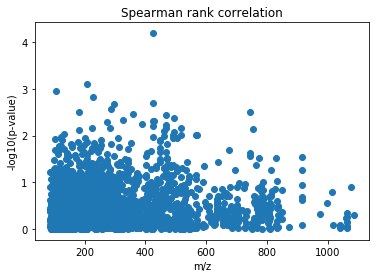

In [8]:
# Parsing out mz and retention time, as this table has a ID format row1_85.0402_51
# whereas 85.0402 is m/z, 51 is retention time in second

mzlist = [float(x.split("_")[1]) for x in metabo["vax05_pos_metabo_feature"]]
rtlist = [int(x.split("_")[2]) for x in metabo["vax05_pos_metabo_feature"]]

# Manhattan plot, using p-values from above Spearman rank correlation
LGpval2 = [-np.log10(x) for x in plist]

# this makes Manhattan plot, -log10(p-value) vs mz
plt.scatter(mzlist, LGpval2)
plt.xlabel("m/z")
plt.ylabel("-log10(p-value)")
plt.title("Spearman rank correlation")

## Exercise 3. Linear regression accounting for age and sex




In [9]:
# read demographic information
dem = pd.read_csv("data/HZ_demographics.txt", sep="\t")
dem

,subject,age,sex
0,ZV101,29,F
1,ZV103,62,F
2,ZV104,35,F
3,ZV105,73,F
4,ZV106,38,F
5,ZV107,71,M
6,ZV108,71,F
7,ZV110,30,M
8,ZV111,76,F
9,ZV112,37,F


#### The problem turns out to be
* IDs are different in this file
* Not all subjects match

The antibody data are already matched to metabolomics data. We will match the demographics to antibody table.

In [10]:
wanted_ids = antibody.values[:,0]
print(wanted_ids)

['ZV1-01-d0' 'ZV1-04-d0' 'ZV1-05-d0' 'ZV1-06-d0' 'ZV1-08-d0' 'ZV1-09-d0'
 'ZV1-10-d0' 'ZV1-11-d0' 'ZV1-12-d0' 'ZV1-13-d0' 'ZV1-14-d0' 'ZV1-15-d0'
 'ZV1-16-d0' 'ZV1-17-d0' 'ZV1-18-d0' 'ZV1-19-d0' 'ZV1-20-d0' 'ZV1-21-d0'
 'ZV1-22-d0' 'ZV1-25-d0' 'ZV1-26-d0' 'ZV1-27-d0' 'ZV1-29-d0' 'ZV1-31-d0'
 'ZV1-32-d0' 'ZV1-33-d0' 'ZV1-34-d0' 'ZV1-35-d0' 'ZV1-36-d0' 'ZV1-37-d0'
 'ZV1-38-d0' 'ZV1-39-d0' 'ZV1-42-d0' 'ZV1-43-d0' 'ZV1-44-d0' 'ZV2-01-d0'
 'ZV2-02-d0' 'ZV2-03-d0' 'ZV2-04-d0' 'ZV2-05-d0' 'ZV2-06-d0' 'ZV2-07-d0'
 'ZV2-08-d0' 'ZV2-09-d0' 'ZV2-10-d0' 'ZV2-11-d0' 'ZV2-12-d0' 'ZV2-14-d0'
 'ZV2-15-d0' 'ZV2-16-d0' 'ZV2-17-d0' 'ZV2-19-d0' 'ZV2-20-d0' 'ZV2-21-d0'
 'ZV2-22-d0' 'ZV2-23-d0' 'ZV2-24-d0' 'ZV2-25-d0' 'ZV2-26-d0' 'ZV2-27-d0'
 'ZV2-28-d0' 'ZV2-30-d0' 'ZV2-31-d0' 'ZV2-32-d0' 'ZV2-33-d0' 'ZV2-34-d0'
 'ZV2-35-d0' 'ZV2-36-d0' 'ZV2-38-d0' 'ZV2-39-d0']


In [11]:
# make a function to convert ID format
def conv(x):
    return x[:3] + '-' + x[3:5] + '-d0'

# test the function
conv('ZV239')

'ZV2-39-d0'

In [12]:
dem_ids = [conv(x) for x in dem["subject"]]
# some subjects not in one table or the other
print([x for x in dem_ids if x not in wanted_ids])
print([x for x in wanted_ids if x not in dem_ids])

# overlap number
common_subjs = set(dem_ids).intersection(set(wanted_ids))
print(len(common_subjs))

# Check if they are in the metabolomics table
subjs_metabo = metabo.columns[1:]
print("Number of common subjects found in the metabolomics table", 
      len(common_subjs.intersection(set(subjs_metabo))))

# sort the subjects by ids
common_subjs = list(common_subjs)
common_subjs.sort()

['ZV1-03-d0', 'ZV1-07-d0', 'ZV1-23-d0', 'ZV2-13-d0', 'ZV2-18-d0', 'ZV2-37-d0']
['ZV1-25-d0', 'ZV1-29-d0', 'ZV1-32-d0', 'ZV1-33-d0']
66
Number of common subjects found in the metabolomics table 66


#### So only 66 subjects are common among three tables

We will reformat data to use these 66 subjects only.

In [13]:
# This gets the columns in metabolomics table corresponding to the common subjects
metabo2 = metabo[["vax05_pos_metabo_feature"] + common_subjs]

# transpose the data
metabo2 = metabo2.T

# have a look
print(metabo2.shape)
metabo2.head()

(67, 2216)


,0,1,2,3,4,5,6,7,8,9,...,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215
vax05_pos_metabo_feature,row1_85.0402_51,row2_85.0654_82,row3_85.0653_321,row4_85.0766_39,row5_85.0766_557,row6_85.1015_35,row7_85.1016_594,row8_85.5743_124,row9_86.0606_271,row10_86.097_82,...,row2207_1041.6773_574,row2208_1061.6548_575,row2209_1062.6587_574,row2210_1063.6622_571,row2211_1063.6707_571,row2212_1063.6785_573,row2213_1064.6746_571,row2214_1065.6795_573,row2215_1076.7948_61,row2216_1087.6691_569
ZV1-01-d0,22.21,23.101,23.027,21.302,22.99,22.81,22.467,21.704,24.505,32.593,...,25.394,24.728,24.278,25.72,25.766,25.72,24.804,23.76,23.764,22.429
ZV1-04-d0,23.31,22.825,23.129,21.094,23.521,23.056,22.841,24.017,23.593,31.951,...,23.008,22.438,21.614,24.26,24.256,24.26,23.312,19.893,24.283,20.565
ZV1-05-d0,22.698,23.485,22.897,21.491,23.071,23.098,22.392,23.312,24.327,31.785,...,25.638,24.862,24.286,25.634,25.656,25.634,24.67,22.016,24.33,22.993
ZV1-06-d0,23.231,22.524,23.409,21.44,22.37,23.006,22.189,22.936,25.047,31.959,...,23.126,24.446,23.931,26.14,26.129,26.14,25.235,23.26,24.439,24.088


In [14]:
# Get antibody data to same subjects and format
# startig by indexing antibody data
abdict = dict(antibody.values)
abdict

{'ZV1-01-d0': 1.88460491732,
 'ZV1-04-d0': 0.393171539534,
 'ZV1-05-d0': -0.168907116013,
 'ZV1-06-d0': 0.939257119928,
 'ZV1-08-d0': 0.8867176877420001,
 'ZV1-09-d0': 0.222364462621,
 'ZV1-10-d0': 1.19763615237,
 'ZV1-11-d0': 1.10278228483,
 'ZV1-12-d0': 0.762558479123,
 'ZV1-13-d0': 0.482859517764,
 'ZV1-14-d0': 3.0689512582300003,
 'ZV1-15-d0': 2.65547089634,
 'ZV1-16-d0': 3.1246102699,
 'ZV1-17-d0': 0.0817177637889,
 'ZV1-18-d0': 0.0863458728906,
 'ZV1-19-d0': 0.576659453171,
 'ZV1-20-d0': -0.112593136382,
 'ZV1-21-d0': -0.41399468905,
 'ZV1-22-d0': 1.534434276,
 'ZV1-25-d0': 0.417979369872,
 'ZV1-26-d0': 0.501312407387,
 'ZV1-27-d0': 0.810411941305,
 'ZV1-29-d0': 1.03285943748,
 'ZV1-31-d0': 2.36204892011,
 'ZV1-32-d0': 0.459069981942,
 'ZV1-33-d0': 0.5890353933879999,
 'ZV1-34-d0': 0.70982310786,
 'ZV1-35-d0': 3.04982788067,
 'ZV1-36-d0': 0.365258566978,
 'ZV1-37-d0': 0.156323789053,
 'ZV1-38-d0': 0.6473476881620001,
 'ZV1-39-d0': 2.57909359242,
 'ZV1-42-d0': 1.35619598841,
 'ZV1

In [15]:
antibody_list = [abdict[x] for x in common_subjs]
# have a look at first 5 values
antibody_list[:5]

[1.88460491732,
 0.393171539534,
 -0.168907116013,
 0.939257119928,
 0.8867176877420001]

In [16]:
# Get demographic data to same subjects and format

agedict0 = dict(dem[['subject', 'age']].values)
sexdict0 = dict(dem[['subject', 'sex']].values)

# note that this uses differenct subj ID; updating by conv
# print(agedict0)
agedict, sexdict = {}, {}

for k,v in agedict0.items():
    agedict[conv(k)] = v
    
for k,v in sexdict0.items():
    sexdict[conv(k)] = v
      
print(agedict)

agelist = [agedict[x] for x in common_subjs]
sexlist = [sexdict[x] for x in common_subjs]

print(agelist, sexlist)

{'ZV1-01-d0': 29, 'ZV1-03-d0': 62, 'ZV1-04-d0': 35, 'ZV1-05-d0': 73, 'ZV1-06-d0': 38, 'ZV1-07-d0': 71, 'ZV1-08-d0': 71, 'ZV1-10-d0': 30, 'ZV1-11-d0': 76, 'ZV1-12-d0': 37, 'ZV1-09-d0': 68, 'ZV1-13-d0': 32, 'ZV1-14-d0': 74, 'ZV1-15-d0': 34, 'ZV1-16-d0': 30, 'ZV1-17-d0': 28, 'ZV1-18-d0': 64, 'ZV1-19-d0': 68, 'ZV1-20-d0': 73, 'ZV1-21-d0': 26, 'ZV1-23-d0': 25, 'ZV1-26-d0': 67, 'ZV1-27-d0': 62, 'ZV1-34-d0': 39, 'ZV1-35-d0': 62, 'ZV1-36-d0': 33, 'ZV1-37-d0': 67, 'ZV1-22-d0': 77, 'ZV1-31-d0': 26, 'ZV1-38-d0': 25, 'ZV1-39-d0': 63, 'ZV1-42-d0': 31, 'ZV1-43-d0': 70, 'ZV1-44-d0': 68, 'ZV2-03-d0': 33, 'ZV2-04-d0': 28, 'ZV2-01-d0': 29, 'ZV2-02-d0': 34, 'ZV2-05-d0': 33, 'ZV2-06-d0': 28, 'ZV2-07-d0': 33, 'ZV2-09-d0': 28, 'ZV2-11-d0': 29, 'ZV2-12-d0': 40, 'ZV2-10-d0': 25, 'ZV2-14-d0': 40, 'ZV2-13-d0': 31, 'ZV2-15-d0': 68, 'ZV2-08-d0': 33, 'ZV2-16-d0': 68, 'ZV2-17-d0': 60, 'ZV2-20-d0': 62, 'ZV2-18-d0': 66, 'ZV2-21-d0': 68, 'ZV2-22-d0': 73, 'ZV2-24-d0': 28, 'ZV2-28-d0': 72, 'ZV2-23-d0': 60, 'ZV2-27-d0': 

Now we have the metabolomics table, antibody level, age and sex in the consistent format for the 66 subjects.

We can start building a regression model:

`Antibody = M + age + sex`

where M is a metabolite feature. We test the model for each metabolite feature to see if the M is significant in predicting the antibody level.

In [17]:
# recheck what's in metabo2. Row 1 is labels
metabo2.values[0:3, 0:6]


array([['row1_85.0402_51', 'row2_85.0654_82', 'row3_85.0653_321',
        'row4_85.0766_39', 'row5_85.0766_557', 'row6_85.1015_35'],
       [22.21, 23.101, 23.027, 21.302, 22.99, 22.81],
       [23.31, 22.825, 23.129, 21.094, 23.521, 23.056]], dtype=object)

In [18]:
# For one metabolite, this looks like

DF = pd.DataFrame({"antibody": antibody_list, 
                  "age": agelist,
                  "sex": sexlist,
                  "M": list(metabo2.values[1:,1])})
DF

,antibody,age,sex,M
0,1.884605,29,F,23.101
1,0.393172,35,F,22.825
2,-0.168907,73,F,23.485
3,0.939257,38,F,22.524
4,0.886718,71,F,23.333
5,0.222364,68,M,23.378
6,1.197636,30,M,23.444
7,1.102782,76,F,22.106
8,0.762558,37,F,23.020
9,0.482860,32,F,23.618


In [19]:
# For one metabolite, the model (OLS) is like

model = ols("antibody ~ M + age + sex", DF).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               antibody   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     3.321
Date:                Thu, 29 Aug 2019   Prob (F-statistic):             0.0254
Time:                        19:27:39   Log-Likelihood:                -86.074
No. Observations:                  66   AIC:                             180.1
Df Residuals:                      62   BIC:                             188.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2266      6.753     -0.774      0.4

In [20]:
# to get p-value on the metabolite:
model.pvalues.loc['M']

0.2861297681567807

#### Now we loop the same model fitting over all metabolites

In [21]:
plist = []

# we have 2216 metabolite features
for ii in range(2216):
    DF = pd.DataFrame({"antibody": antibody_list, 
                  "age": agelist,
                  "sex": sexlist,
                  "M": list(metabo2.values[1:,ii])})
    model = ols("antibody ~ M + age + sex", DF).fit()
    plist.append( model.pvalues.loc['M'] )
    
print("Got p-value list, ", len(plist))

Got p-value list,  2216


Text(0.5, 1.0, 'Linear regression')

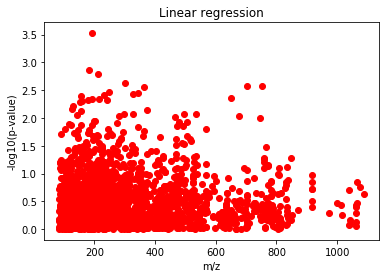

In [22]:
# We did not change the order of metabolite features, so the mzlist is still valid
# Manhattan plot, using p-values from above Spearman rank correlation
LGpval3 = [-np.log10(x) for x in plist]

# this makes Manhattan plot, -log10(p-value) vs mz
plt.scatter(mzlist, LGpval3, c='red')
plt.xlabel("m/z")
plt.ylabel("-log10(p-value)")
plt.title("Linear regression")


#### Now we compute the FDR

In [23]:
fdrs = multipletests(plist, method = 'fdr_bh')[1]

In [25]:
# output result table
# mz, rt, pvalue, FDR

s = 'mz\trtime\tp-value\tFDR_BH\n' 
for ii in range(2216):
    s += '\t'.join([str(x) for x in [mzlist[ii], rtlist[ii], plist[ii], fdrs[ii]]]) + '\n'

    
with open('regression_result.txt', 'w') as O:
    O.write(s)